# Gaming Stocks

A lower risk portfolio from silicon valley stocks.

In [2]:
import pandas as pd
import numpy as np
import datetime
start = datetime.datetime(2020,2,1)
end = datetime.date.today()
from scipy.optimize import minimize
import matplotlib.pyplot as plt
%matplotlib inline  
plt.style.use('dark_background')
from IPython.core.pylabtools import figsize
figsize(12.0, 8.0)
import sys
sys.path.insert(0, '../scripts/')
from database import Stock

In [3]:
stk_set = {}
symbols = ['TTWO', '7CD.F', 'GME', 'ATVI', 'CCOEY', 'TCEHY', 'EA']
for sym in symbols:
    stk_set[sym]= Stock(sym, start, end).df.Close
hist_data = pd.concat(stk_set, axis=1).dropna()

<AxesSubplot:xlabel='Date'>

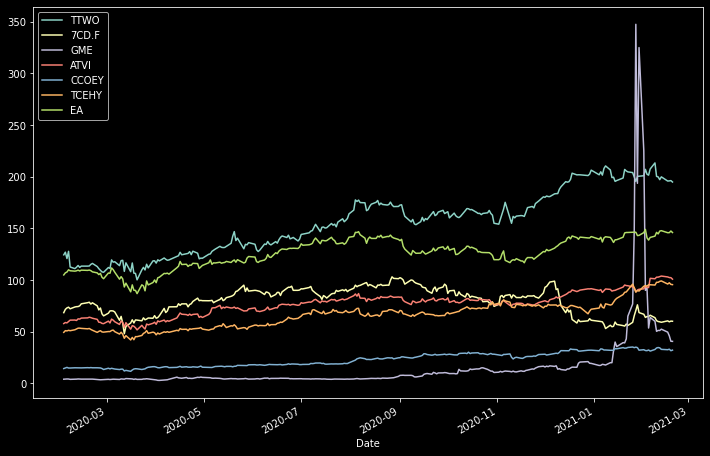

In [4]:
hist_data.plot()

array([[<AxesSubplot:title={'center':'TTWO'}>,
        <AxesSubplot:title={'center':'7CD.F'}>,
        <AxesSubplot:title={'center':'GME'}>],
       [<AxesSubplot:title={'center':'ATVI'}>,
        <AxesSubplot:title={'center':'CCOEY'}>,
        <AxesSubplot:title={'center':'TCEHY'}>],
       [<AxesSubplot:title={'center':'EA'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

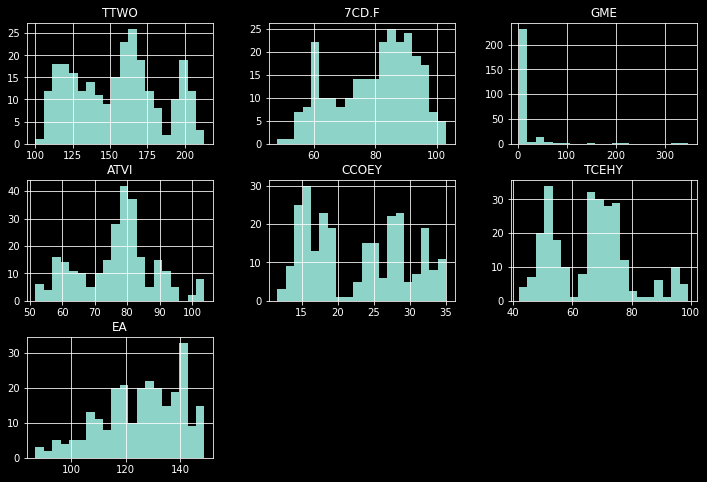

In [5]:
hist_data.hist(bins=20)

In [6]:
returns = np.log(hist_data/hist_data.shift(1))

In [7]:
returns.mean()

TTWO     0.001734
7CD.F   -0.000501
GME      0.008995
ATVI     0.002145
CCOEY    0.003130
TCEHY    0.002552
EA       0.001275
dtype: float64

In [8]:
returns.mean().mean()

0.002761629466791218

In [9]:
# the objective function is to minimize the portfolio risk
def objective(weights): 
    weights = np.array(weights)
    return weights.dot(returns.cov()).dot(weights.T)

# The constraints
cons = (# The weights must sum up to one.
        {"type":"eq", "fun": lambda x: np.sum(x)-1}, 
        # This constraints says that the inequalities (ineq) must be non-negative.
        # The expected daily return of our portfolio and we want to be at greater than 0.003
        {"type": "ineq", "fun": lambda x: np.sum(returns.mean()*x)-0.003}) 
 
# Every stock can get any weight from 0 to 1
bounds = tuple((0,1) for x in range(returns.shape[1])) 
 
# Initialize the weights with an even split
# In out case each stock will have 10% at the beginning
guess = [1./returns.shape[1] for x in range(returns.shape[1])]
optimized_results = minimize(objective, guess, method = "SLSQP", bounds=bounds, constraints=cons)
optimized_results

     fun: 0.0005342141121571925
     jac: array([0.00071057, 0.00051697, 0.00417197, 0.00070391, 0.00075199,
       0.00068322, 0.00067416])
 message: 'Optimization terminated successfully'
    nfev: 48
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([0.15135048, 0.        , 0.10386437, 0.17800222, 0.23517486,
       0.20546986, 0.12613822])

In [10]:
optimized_results.x

array([0.15135048, 0.        , 0.10386437, 0.17800222, 0.23517486,
       0.20546986, 0.12613822])

In [11]:
np.sum(optimized_results.x)

1.0

In [12]:
np.sum(returns.mean()*optimized_results.x)

0.0030000000000740485

### Portfolio Weight



In [14]:
pd.DataFrame(list(zip(symbols, optimized_results.x)), columns=['Symbol', 'Weight'])

,Symbol,Weight
0,TTWO,0.151350
1,7CD.F,0.000000
2,GME,0.103864
3,ATVI,0.178002
4,CCOEY,0.235175
5,TCEHY,0.205470
6,EA,0.126138


### Portfolio Return



In [15]:
weight = optimized_results.x
r = returns 
t = np.sum(weight)
W = weight/t
wp = np.dot(r, W)
port_ret = pd.DataFrame({'daily_log_return': wp})
port_ret.index = r.index

<AxesSubplot:xlabel='Date'>

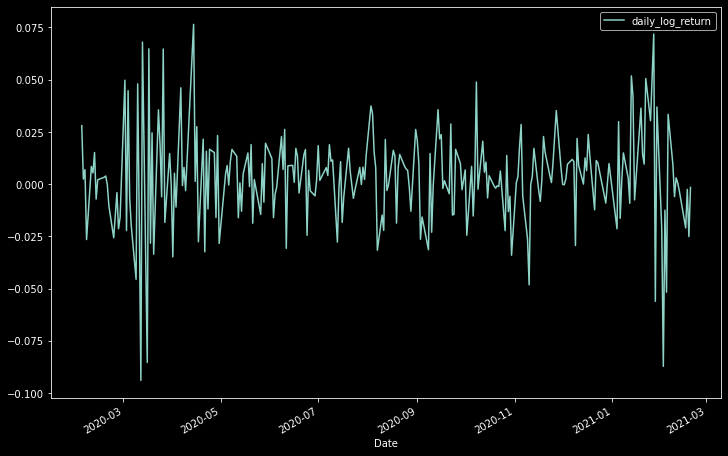

In [16]:
port_ret.plot()

### Backtesting 
Cumulative Wealth

In [17]:
def cumulative_wealth_plot(x):
    return ((1*x+1).cumprod()-1).plot(figsize = (15, 6), title='Cumulative Wealth');

<AxesSubplot:title={'center':'Cumulative Wealth'}, xlabel='Date'>

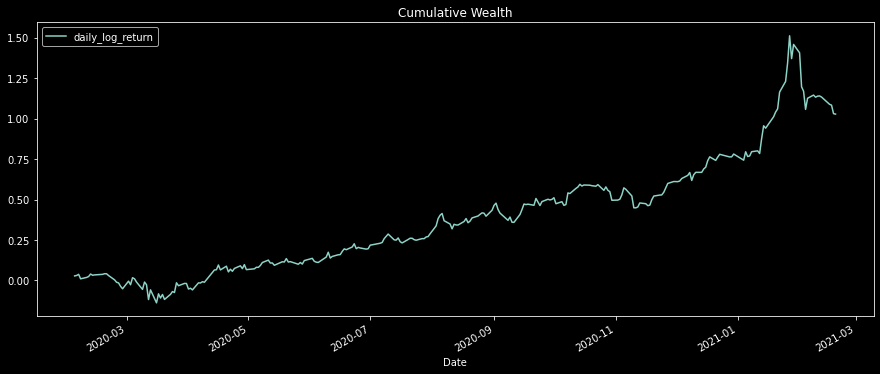

In [18]:
cumulative_wealth_plot(port_ret)